<a href="https://colab.research.google.com/github/knxghtly/python-tensorflow-MLDL-Study/blob/main/%5B10%5DLSTM_%26_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 LSTM 셀 (Long Short-Term Memory)

LSTM(Long Short-Term Memory)은 **장기 의존성 문제**를 해결하기 위해 고안된 [RNN](https://en.wikipedia.org/wiki/Recurrent_neural_network) 구조입니다.  
일반적인 RNN은 **그래디언트 소실 문제**로 인해 긴 시퀀스를 학습하기 어려운데, LSTM은 **셀 상태(Cell State)**를 활용하여 중요한 정보를 오래 보존할 수 있습니다.  

---

## 🔹 LSTM의 주요 구성 요소

LSTM 셀은 **셀 상태(Cell State)**와 **세 가지 게이트(Gates)**로 이루어져 있습니다.  

1. **셀 상태 (Cell State)**: $c$
   - 정보를 장기적으로 저장하는 경로입니다.
   - 필요 없는 정보는 제거하고, 중요한 정보는 유지합니다.
   - Forget, Input Gate를 적절히 섞음
   - 출력: $c$: tanh

2. **입력 게이트 (Input Gate)**: $w_i, w_j$
   - 새로운 정보를 셀 상태에 얼마나 추가할지 결정합니다.
   - $(w_i+w_j) × c$
   - 출력: $w_i$: sigmoid, $w_j$: tanh


3. **망각 게이트 (Forget Gate)**: $w_f$
   - 과거 정보를 얼마나 유지할지 조절합니다.
   - $w_f × c$
   - 출력: $w_f$: sigmoid

4. **출력 게이트 (Output Gate)**
   - 현재 상태에서 어떤 값을 출력할지 결정합니다.
   - 다음 상태 결정

---

## 🔹 LSTM의 작동 과정

1. **망각 게이트**가 이전 정보를 얼마나 남길지 결정  
2. **입력 게이트**가 새로운 정보를 셀 상태에 추가  
3. **셀 상태**를 업데이트  
4. **출력 게이트**가 최종 출력을 결정  

> 💡 LSTM은 **셀 상태(Cell State)를 통해 중요한 정보를 오랜 기간 유지**할 수 있습니다.

---

## 🔹 LSTM의 장점

✅ **장기 의존성 문제 해결** – 긴 시퀀스 학습 가능  
✅ **그래디언트 소실 문제 완화** – 중요한 정보 보존  
✅ **다양한 분야에서 활용** – 시계열 예측, 자연어 처리(NLP), 음성 인식 등  

---

## 🔹 GRU와의 비교

LSTM과 유사한 구조로 **[GRU (Gated Recurrent Unit)](https://en.wikipedia.org/wiki/Gated_recurrent_unit)**가 있습니다.  
GRU는 LSTM보다 **구조가 간단**하지만, 성능 차이는 데이터에 따라 다를 수 있습니다.

|  비교 항목  | LSTM | GRU |
|------------|------|------|
| 게이트 수  | 3개 (Forget, Input, Output) | 2개 (Reset, Update) |
| 셀 상태    | O | X |
| 계산량     | 많음 | 적음 |
| 성능 차이  | 데이터에 따라 다름 | 데이터에 따라 다름 |

---

## 🔹 참고 자료
- [RNN과 LSTM의 차이점](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [LSTM 논문 (Hochreiter & Schmidhuber, 1997)](https://www.bioinf.jku.at/publications/older/2604.pdf)

🚀 **LSTM을 Colab에서 직접 실습해보고 싶다면?**
```python
import torch.nn as nn

# LSTM 모델 정의
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
    def forward(self, x):
        output, _ = self.lstm(x)
        return output


#데이터 준비

In [7]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# data 로드 & 샘플 개수(batch_size)=15000, voca=400 조정
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=400)
for var in ["train_input", "train_target", "test_input", "test_target"]:
    globals()[var] = globals()[var][:10000]
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

# 시퀀스패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
for var in ["train_input", "train_target", "val_input", "val_target", "test_input", "test_target"]:
    print(var+".shape:\t", globals()[var].shape)
for var in ["train_seq", "val_seq"]:
    print(var+".shape:\t", globals()[var].shape)

train_input.shape:	 (8000,)
train_target.shape:	 (8000,)
val_input.shape:	 (2000,)
val_target.shape:	 (2000,)
test_input.shape:	 (10000,)
test_target.shape:	 (10000,)
train_seq.shape:	 (8000, 100)
val_seq.shape:	 (2000, 100)


#모델 구성(LSTM)

In [8]:
model = keras.Sequential()

model.add(keras.layers.Embedding(input_dim=400, output_dim=16, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,209 (28.16 KB)

 Trainable params: 7,209 (28.16 KB)

 Non-trainable params: 0 (0.00 B)

(8000,)
(8000, 100)


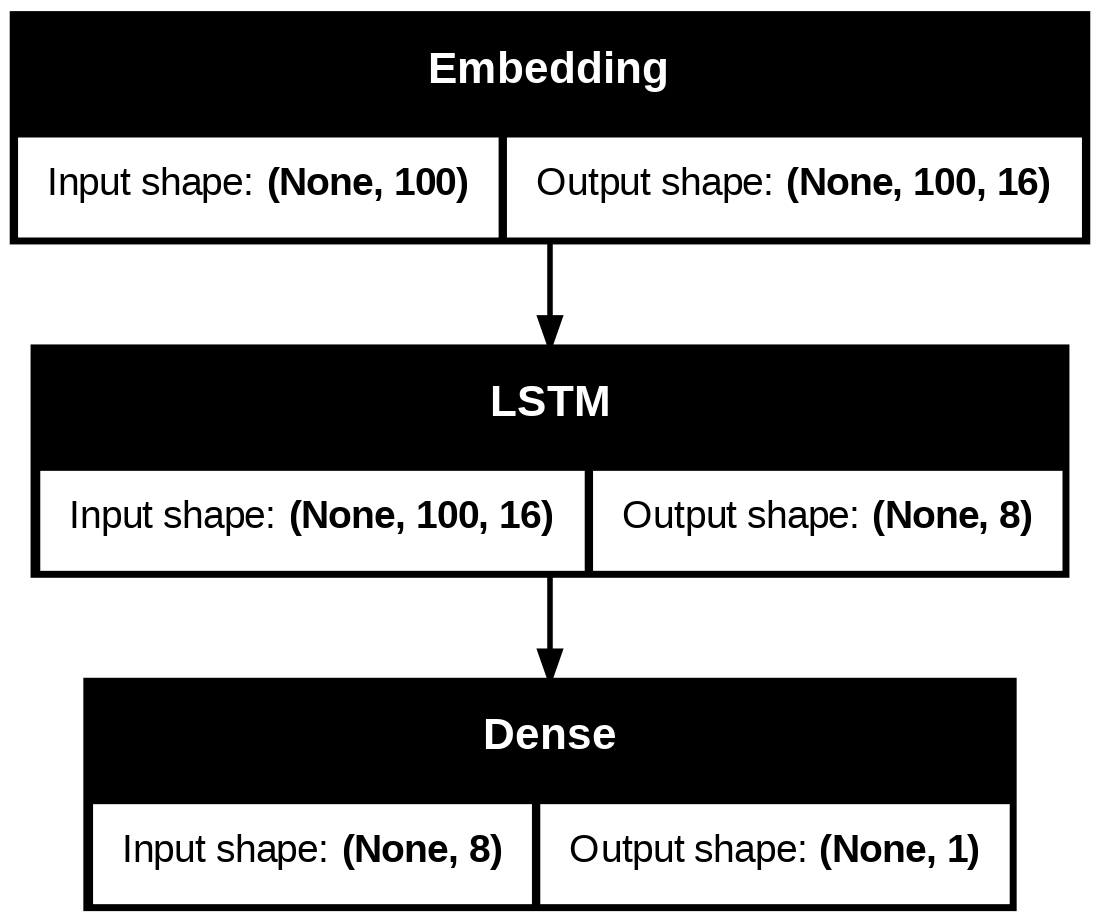

In [9]:
print(train_input.shape)
print(train_seq.shape)
keras.utils.plot_model(model, show_shapes=True)

###compile, fit

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy",
              metrics=["accuracy"])
# callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [11]:
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    verbose=2,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

결과 확인

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


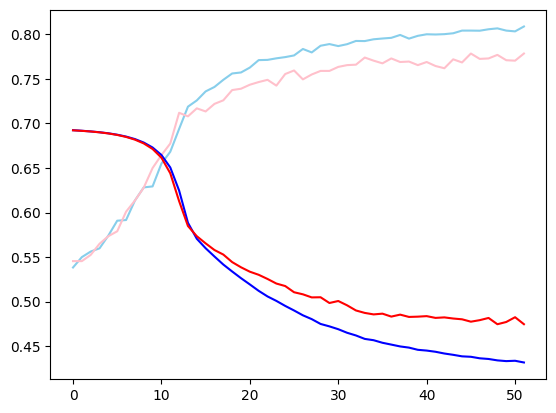

[0.436 0.434 0.433 0.434 0.432]


In [12]:
print(history.history.keys())
plt.plot(history.history["accuracy"], color="skyblue")
plt.plot(history.history["val_accuracy"], color="pink")
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.show()
print(np.round(history.history["loss"][-5:], decimals=3))

#모델 구성(GRU)

In [13]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(input_dim=400, output_dim=16, input_shape=(100,)))
model2.add(keras.layers.GRU(8))
model2.add(keras.layers.Dense(1, activation="sigmoid"))
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,033 (27.47 KB)

 Trainable params: 7,033 (27.47 KB)

 Non-trainable params: 0 (0.00 B)

(8000,)
(8000, 100)


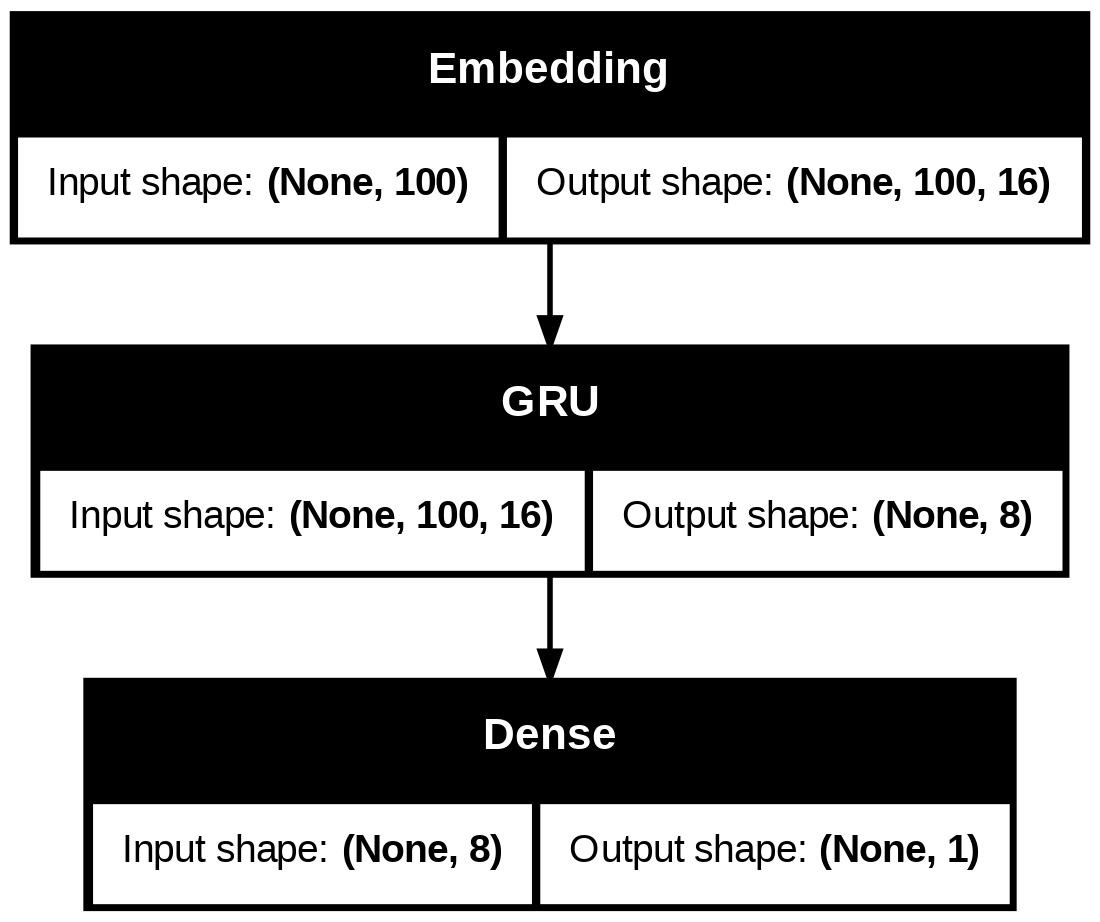

In [14]:
print(train_input.shape)
print(train_seq.shape)
keras.utils.plot_model(model2, show_shapes=True)

###compile, fit

In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss="binary_crossentropy",
              metrics=["accuracy"])
# callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [16]:
history2 = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    verbose=2,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
125/125 - 4s - 32ms/step - accuracy: 0.8062 - loss: 0.4339 - val_accuracy: 0.7720 - val_loss: 0.4758
Epoch 2/100
125/125 - 4s - 30ms/step - accuracy: 0.8065 - loss: 0.4327 - val_accuracy: 0.7735 - val_loss: 0.4768
Epoch 3/100
125/125 - 6s - 45ms/step - accuracy: 0.8062 - loss: 0.4318 - val_accuracy: 0.7790 - val_loss: 0.4760
Epoch 4/100
125/125 - 3s - 27ms/step - accuracy: 0.8067 - loss: 0.4311 - val_accuracy: 0.7735 - val_loss: 0.4771


결과 확인

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


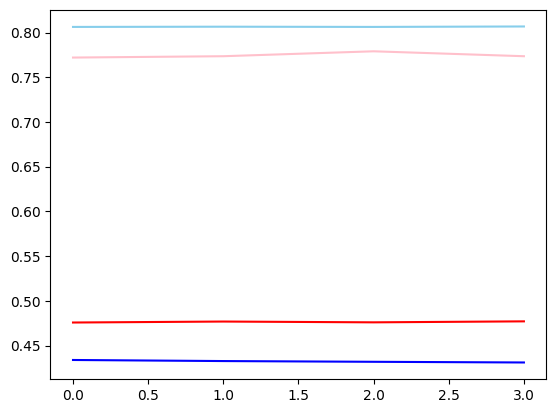

[0.434 0.433 0.432 0.431]


In [17]:
print(history2.history.keys())
plt.plot(history2.history["accuracy"], color="skyblue")
plt.plot(history2.history["val_accuracy"], color="pink")
plt.plot(history2.history["loss"], color="b")
plt.plot(history2.history["val_loss"], color="r")
plt.show()
print(np.round(history2.history["loss"][-5:], decimals=3))